In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In order to get confidence intervals for DCRNN predictions, I applied dropout at prediction time. I used 10 predictions to calculate the prediction intervals. The dropout rate was set at 20%. The reason this method works is that a neural network with dropout applied is mathematically equivalent to an approximation of a Gaussian process.

get groudtruth data and 10 groups of prediction data

In [2]:
pred_list = []
for i in range (10):
    pred_list.append(np.load('./data/'+str(i+1)+'.npz')['predictions'])
    
predictions = np.stack((pred_list[0], pred_list[1],pred_list[2], pred_list[3],pred_list[4], pred_list[5],
          pred_list[6], pred_list[7],pred_list[8], pred_list[9]))

groundtruth = np.load('./data/1.npz')['groundtruth']


compute the empirical mean and std of the 10 groups of outputs

In [3]:
t = np.arange(0, 6850, 1)
mean = np.mean(predictions, axis=0)
std = np.std(predictions, axis=0)

some confidence interval plot examples

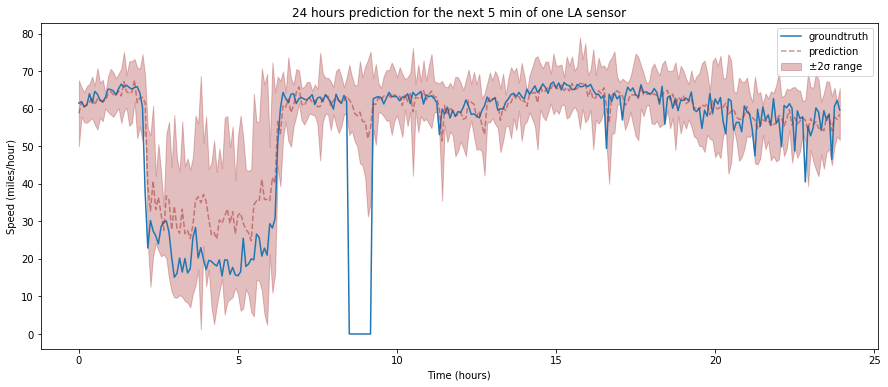

In [4]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(t[0:288]/12, groundtruth.T[100].T[0][0:288], label='groundtruth')
ax.plot(t[0:288]/12, mean.T[100].T[0][0:288], label='prediction', c='brown', linestyle='--', alpha=0.5)
ax.fill_between(t[0:288]/12, mean.T[100].T[0][0:288] - 2*std.T[100].T[0][0:288], 
                mean.T[100].T[0][0:288] + 2*std.T[100].T[0][0:288], label='±2σ range', color='brown', alpha=.3)
ax.set(title="24 hours prediction for the next 5 min of one LA sensor", ylabel="Speed (miles/hour)", xlabel="Time (hours)")
ax.legend();

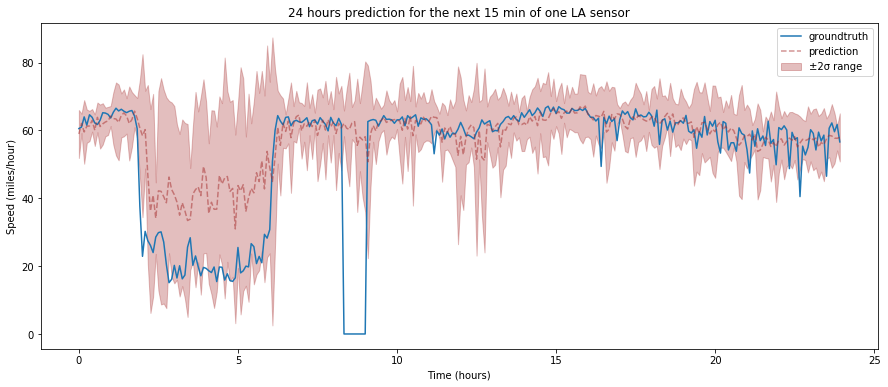

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(t[0:288]/12, groundtruth.T[100].T[2][0:288], label='groundtruth')
ax.plot(t[0:288]/12, mean.T[100].T[2][0:288], label='prediction', c='brown', linestyle='--', alpha=0.5)
ax.fill_between(t[0:288]/12, mean.T[100].T[2][0:288] - 2*std.T[100].T[2][0:288], 
                mean.T[100].T[2][0:288] + 2*std.T[100].T[2][0:288], label='±2σ range', color='brown', alpha=.3)
ax.set(title="24 hours prediction for the next 15 min of one LA sensor", ylabel="Speed (miles/hour)", xlabel="Time (hours)")
ax.legend();

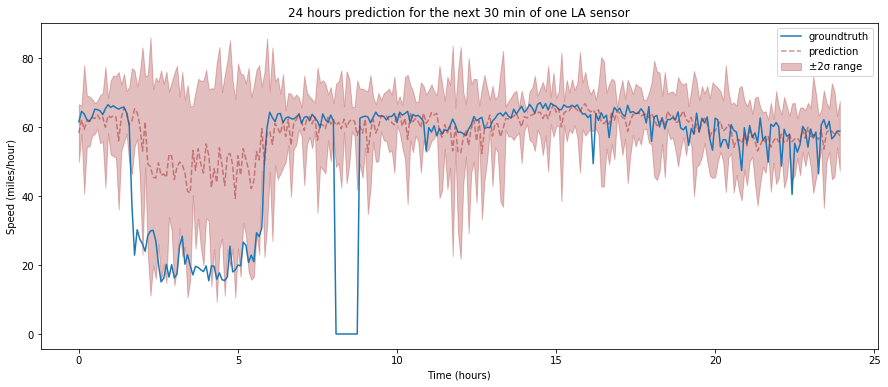

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(t[0:288]/12, groundtruth.T[100].T[5][0:288], label='groundtruth')
ax.plot(t[0:288]/12, mean.T[100].T[5][0:288], label='prediction', c='brown', linestyle='--', alpha=0.5)
ax.fill_between(t[0:288]/12, mean.T[100].T[5][0:288] - 2*std.T[100].T[5][0:288], 
                mean.T[100].T[5][0:288] + 2*std.T[100].T[5][0:288], label='±2σ range', color='brown', alpha=.3)
ax.set(title="24 hours prediction for the next 30 min of one LA sensor", ylabel="Speed (miles/hour)", xlabel="Time (hours)")
ax.legend();

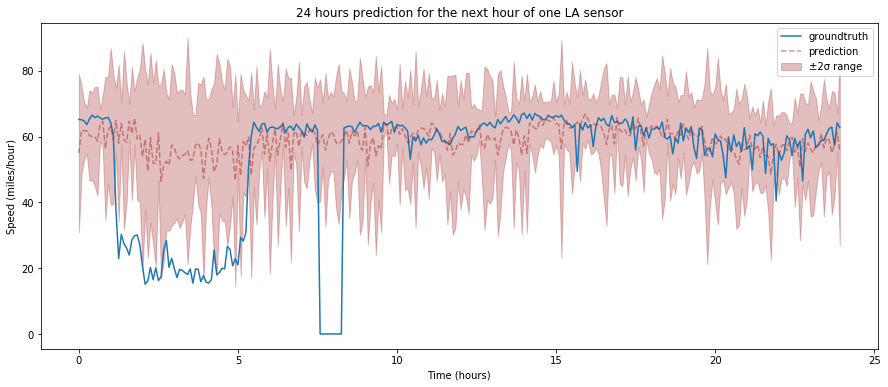

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(t[0:288]/12, groundtruth.T[100].T[11][0:288], label='groundtruth')
ax.plot(t[0:288]/12, mean.T[100].T[11][0:288], label='prediction', c='brown', linestyle='--', alpha=0.5)
ax.fill_between(t[0:288]/12, mean.T[100].T[11][0:288] - 2*std.T[100].T[11][0:288], 
                mean.T[100].T[11][0:288] + 2*std.T[100].T[11][0:288], label='±2σ range', color='brown', alpha=.3)
ax.set(title="24 hours prediction for the next hour of one LA sensor", ylabel="Speed (miles/hour)", xlabel="Time (hours)")
ax.legend();

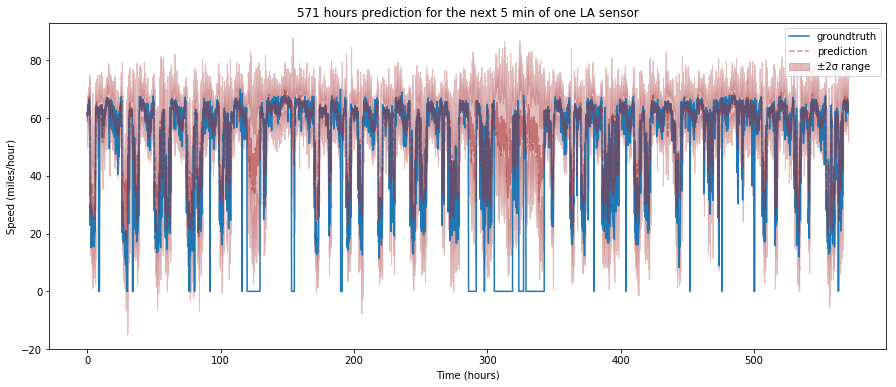

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(t/12, groundtruth.T[100].T[0], label='groundtruth')
ax.plot(t/12, mean.T[100].T[0], label='prediction', c='brown', linestyle='--', alpha=0.5)
ax.fill_between(t/12, mean.T[100].T[0] - 2*std.T[100].T[0], 
                mean.T[100].T[0] + 2*std.T[100].T[0], label='±2σ range', color='brown', alpha=.3)
ax.set(title="571 hours prediction for the next 5 min of one LA sensor", ylabel="Speed (miles/hour)", xlabel="Time (hours)")
ax.legend();